# KRX 데이터를 활용한 포트폴리오

## Introduction

Data : (설명 필요)  
Date : 18Y 4Q ~ 22Y 1Q

### 패키지 로드

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/krx 공모전/data'

/content/drive/MyDrive/krx 공모전/data


In [3]:
!ls

data_0305_20220720.csv	data.xlsx  for_test.xlsx  spag1.xlsx  spag2.xlsx


In [4]:
from glob import glob
import pandas as pd
import numpy as np

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

plt.rc('font', family='NanumBarunGothic') 

In [5]:
#한글 깨짐 처리
#step1 나눔 폰트 설치
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

### 함수

In [6]:
# Sublineplot
def subplots(data,cols,nrow,ncol,title):
  df = data[cols]
  fig, ax = plt.subplots(nrow, ncol, figsize=(6*ncol,5*nrow))
  plt.suptitle(title, y=0.92, size=30)
  i=0
  for col in cols:
    ax[i//ncol,i%ncol].plot(df[col])
    ax[i//ncol,i%ncol].set_ylabel(col)
    i+=1  
  
# lineplot
def lineplot(data,cols,title):
  df = data[cols]
  plt.figure(figsize=(20,10))
  plt.title(title, y=1.05, size=25)
  for col in cols:
    plt.plot(df[col], label=col)
  plt.legend(loc='upper right')  

# corr_matrix
def corr_matrix(data, cols, title):
  df = data[cols]
  colormap = plt.cm.PuBu 
  plt.figure(figsize=(12, 12)) 
  plt.title(title, y=1.05, size=20)
  sns.heatmap(df.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
              square = True, cmap = colormap, linecolor = "white", annot = True, fmt='.2f',
              annot_kws = {"size" : 12})
  plt.show()

# IQR Based Outlier Processing Function Definition
def outliers_iqr(data):
  q1,q3 = np.percentile(data,[25,75])
  iqr=q3-q1
  lower_bound=  q1 - (iqr *1.5)
  upper_bound = q3 + (iqr *1.5)
  data[data>upper_bound] = np.nan #np.mean(data)
  data[data<lower_bound] = np.nan #np.mean(data)
  data.interpolate(method="ffill", inplace=True)
  data.interpolate(method="bfill", inplace=True)
  return data

### 데이터 로드

In [7]:
filst = sorted(glob('*.xlsx'))
filst

['data.xlsx', 'for_test.xlsx', 'spag1.xlsx', 'spag2.xlsx']

In [8]:
data = pd.read_excel(filst[0])
data.head(5)

,분기,종목,자산총계,자본총계,부채총계,매출액,영업이익,당기순이익
0,18Y4Q,유진테크,2.915668e+11,2.634519e+11,2.811489e+10,3.509194e+10,1.068125e+10,2.821543e+08
1,19Y1Q,유진테크,3.069190e+11,2.688406e+11,3.807837e+10,4.282116e+10,1.381908e+10,1.124246e+10
2,19Y2Q,유진테크,3.165687e+11,2.894235e+11,2.714527e+10,6.550883e+10,2.563682e+10,2.077325e+10
3,19Y3Q,유진테크,3.263077e+11,2.984114e+11,2.789634e+10,3.962203e+10,8.644441e+09,9.101949e+09
4,19Y4Q,유진테크,3.185496e+11,2.912752e+11,2.727444e+10,2.623418e+10,-2.851466e+09,-8.300271e+09


## Data processing

### 4가지 지표 생성을 위한 지표 생성   이름 바꿀 수 있으면 설명 필요
안정성 : 부채비율 , 자기자본비율  
수익성 : 매출액순이익률, 매출액영업이익률  
활동성 : 총자산회전율, 자기자본회전율  
성장성 : 영업이익증가율, 순이익증가율  
+ 성장성의 경우, 전 분기 순이익을 활용하기 때문에 18년도 4분기의 성장성을 구할 수 없음

### 4가지 지표

설명 필요

In [9]:
#안정성
data['부채비율'] = data['부채총계']/data['자본총계']*100
data['자기자본비율'] = data['자본총계']/data['자산총계']*100
#data['총자산순이익률'] = data['당기순이익']/data['자산총계']*100
#수익성
data['매출액순이익률'] = data['당기순이익']/data['매출액']*100
data['매출액영업이익률'] = data['영업이익']/ data['매출액'] *100
#활동성
data['총자산회전율'] = data['매출액']/data['자산총계']
data['자기자본회전율']= data['매출액']/ data['자본총계']

#성장성
data['영업이익증가율']=np.NaN
data['순이익증가율'] =np.NaN
for i in range(len(data)-1):
  data['영업이익증가율'][i+1]=(data['영업이익'][i+1]-data['영업이익'][i])/data['영업이익'][i]*100
  data['순이익증가율'][i+1]= (data['당기순이익'][i+1]-data['당기순이익'][i])/data['당기순이익'][i]*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
df_6 = data[['분기','종목','자산총계','자본총계','부채총계','매출액','영업이익','당기순이익']]
df_8 = data[['분기','종목','부채비율','자기자본비율','매출액순이익률','매출액영업이익률','총자산회전율','자기자본회전율','영업이익증가율','순이익증가율']]
#spag = data[['분기','종목','안정성','수익성','활동성','성장성']]

In [11]:
#18년도 4분기 제거
index1=df_8[df_8['분기']=='18Y4Q'].index
df_8.drop(index1,inplace=True)
#인덱싱 재배열
df_8.reset_index(inplace=True)
df_8.drop(['index'],axis=1,inplace=True)
df_8.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,분기,종목,부채비율,자기자본비율,매출액순이익률,매출액영업이익률,총자산회전율,자기자본회전율,영업이익증가율,순이익증가율
0,19Y1Q,유진테크,14.163922,87.593347,26.254461,32.271622,0.139519,0.159281,29.377048,3884.509365
1,19Y2Q,유진테크,9.379083,91.425159,31.710609,39.134906,0.206934,0.226343,85.517542,84.774894


### 시각화

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backe

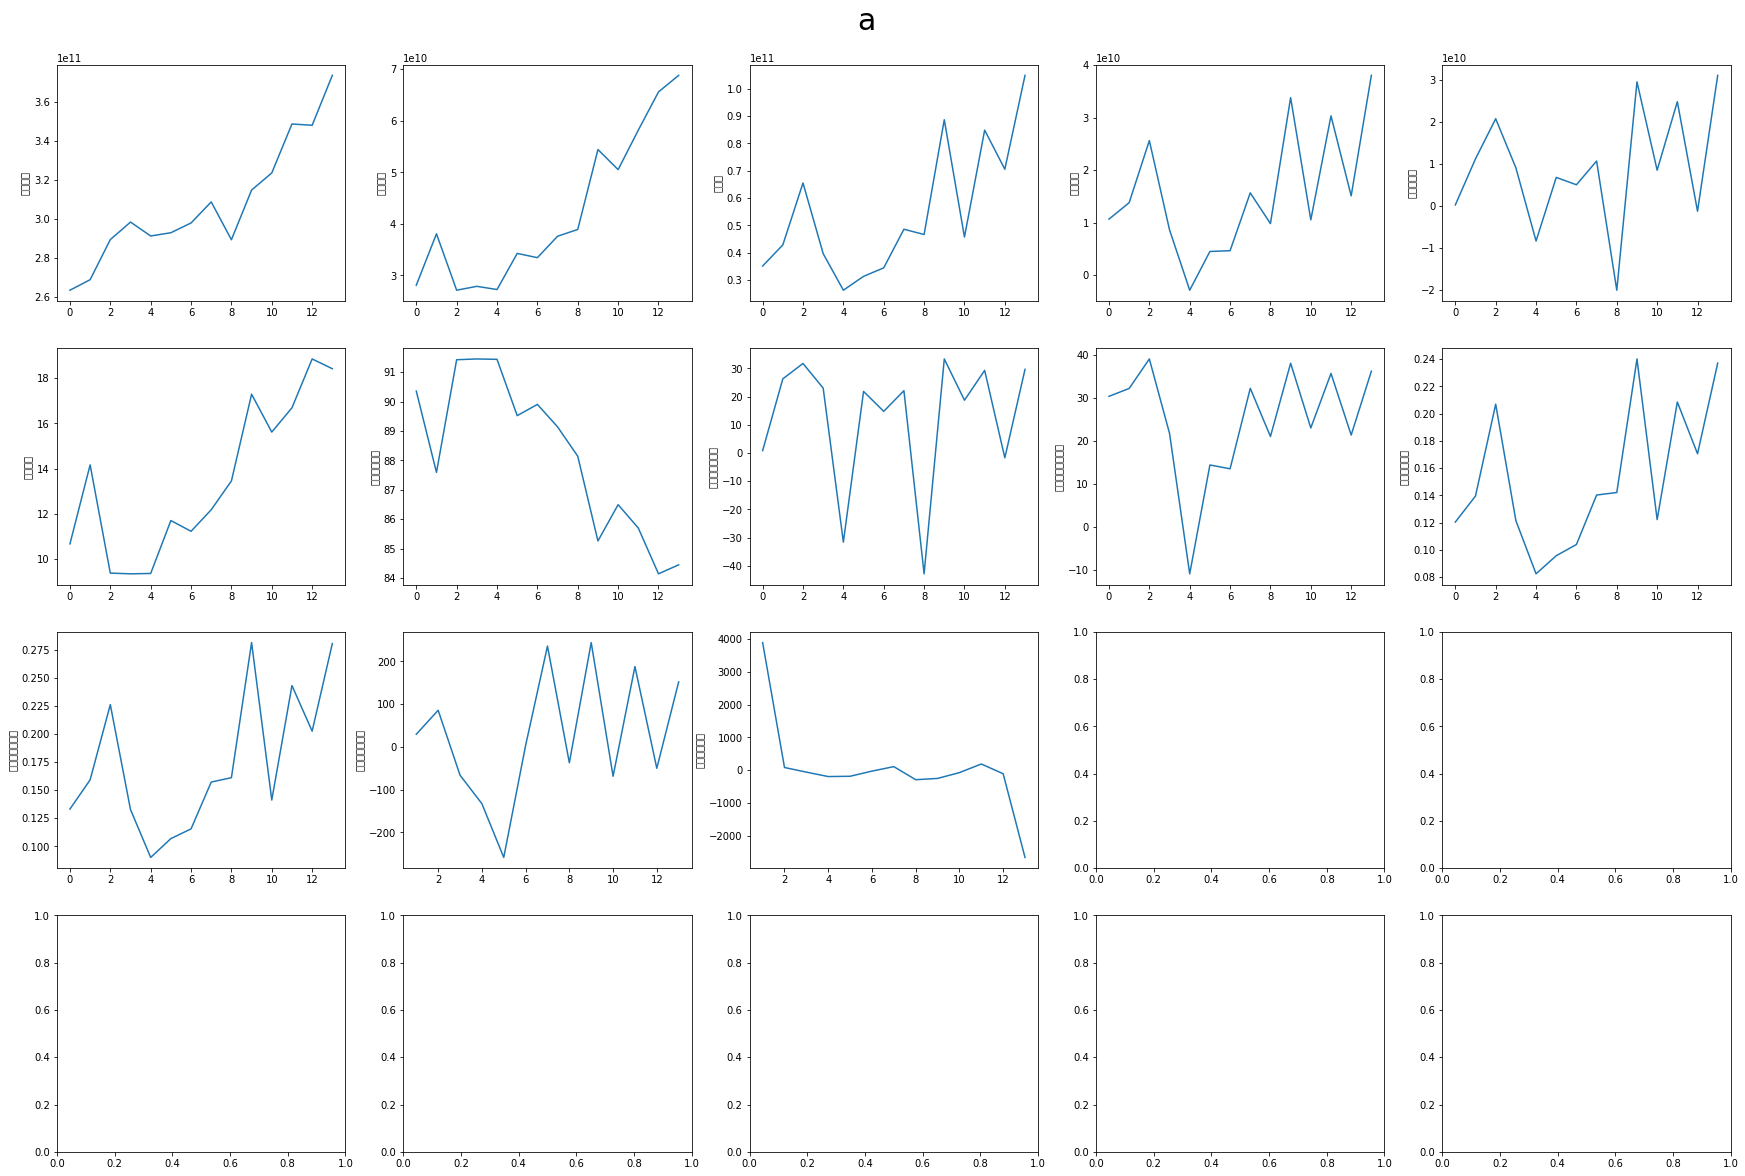

In [12]:
subplots(data[data['종목']=='유진테크'],data[data['종목']=='유진테크'].columns[3:],4,5,'a')

### 8가지 지표를 활용한  
###  안정성, 수익성, 활동성, 성장성 지표 생성

In [13]:
### 첫번째로, 어떻게 만들지.
#data['안정성']=(-data['부채비율']+data['자기자본비율']) /2
#data['수익성']=(data['매출액순이익률']+data['매출액영업이익률']) /2
#data['활동성']=(data['총자산회전율']+data['자기자본회전율'])/2
#data['성장성']=(data['영업이익증가율']+data['순이익증가율'])/2

### RobustScaler 적용

In [14]:
rb_df_8 = df_8.iloc[:,2:]
rb_df_8.head(2)
scaler = RobustScaler()
scaler.fit(rb_df_8)
colnames = rb_df_8.columns
new_colnames = [i for i in colnames]

In [15]:
df_8_RS = pd.concat([df_8.iloc[:,:2],pd.DataFrame(scaler.fit_transform(rb_df_8[colnames]),columns=new_colnames)],axis=1)
df_8_RS.head(2)

,분기,종목,부채비율,자기자본비율,매출액순이익률,매출액영업이익률,총자산회전율,자기자본회전율,영업이익증가율,순이익증가율
0,19Y1Q,유진테크,-0.424816,0.578992,0.856453,1.197120,-0.341300,-0.487426,0.328018,30.088515
1,19Y2Q,유진테크,-0.501623,0.713758,1.169686,1.595622,0.220635,-0.185864,0.861672,0.745940


In [16]:
item = data['종목'].unique()

## Regression

(유진테크 해당 분기 - 반도체 전체 분기) / 반도체 전체 분기  

설명필요

훈련 row data x값들 18.4 - 21.3
     spag     y값   19.1 - 21.4  
테스트 row data x값 21.4
     spag     y값   22.1  

      설명필요

### Model 구성

#### 안정성  
- 부채비율 
- 자기자본비율 

In [17]:
# 안정성
# 부채비율
def stability_1(name):
  df_6_select = df_6[df_6['종목']==name]
  df_8_select = df_8[df_8['종목']==name]
  df_8_select = df_8_select[0:12]
  df_6_select_X = df_6_select[:12]
  df_6_select_x= df_6_select[12:13]

  X = df_6_select_X.iloc[:,2:8]
  Y = df_8_select.iloc[:,2]
  x = df_6_select_x.iloc[:,2:8]
  return X,Y,x

# 자기자본비율
def stability_2(name):
  df_6_select = df_6[df_6['종목']==name]
  df_8_select = df_8[df_8['종목']==name]
  df_8_select = df_8_select[0:12]
  df_6_select_X = df_6_select[:12]
  df_6_select_x= df_6_select[12:13]

  X = df_6_select_X.iloc[:,2:8]
  Y = df_8_select.iloc[:,3]
  x = df_6_select_x.iloc[:,2:8]
  return X,Y,x  

#### 수익성
- 매출액순이익률
- 매출액영업이익률

In [18]:
# 수익성
# 매출액순이익률
def profitability_1(name):
  df_6_select = df_6[df_6['종목']==name]
  df_8_select = df_8[df_8['종목']==name]
  df_8_select = df_8_select[0:12]
  df_6_select_X = df_6_select[:12]
  df_6_select_x= df_6_select[12:13]

  X = df_6_select_X.iloc[:,2:8]
  Y = df_8_select.iloc[:,4]
  x = df_6_select_x.iloc[:,2:8]
  return X,Y,x

# 매출액영업이익률
def profitability_2(name):
  df_6_select = df_6[df_6['종목']==name]
  df_8_select = df_8[df_8['종목']==name]
  df_8_select = df_8_select[0:12]
  df_6_select_X = df_6_select[:12]
  df_6_select_x= df_6_select[12:13]

  X = df_6_select_X.iloc[:,2:8]
  Y = df_8_select.iloc[:,5]
  x = df_6_select_x.iloc[:,2:8]
  return X,Y,x  

#### 활동성
- 총자산회전율
- 자기자본회전율

In [19]:
# 활동성
# 총자산회전율
def activity_1(name):
  df_6_select = df_6[df_6['종목']==name]
  df_8_select = df_8[df_8['종목']==name]
  df_8_select = df_8_select[0:12]
  df_6_select_X = df_6_select[:12]
  df_6_select_x= df_6_select[12:13]

  X = df_6_select_X.iloc[:,2:8]
  Y = df_8_select.iloc[:,6]
  x = df_6_select_x.iloc[:,2:8]
  return X,Y,x

# 자기자본회전율
def activity_2(name):
  df_6_select = df_6[df_6['종목']==name]
  df_8_select = df_8[df_8['종목']==name]
  df_8_select = df_8_select[0:12]
  df_6_select_X = df_6_select[:12]
  df_6_select_x= df_6_select[12:13]

  X = df_6_select_X.iloc[:,2:8]
  Y = df_8_select.iloc[:,7]
  x = df_6_select_x.iloc[:,2:8]
  return X,Y,x  

#### 성장성
- 영업이익증가율
- 순이익증가율

In [20]:
# 성장성
# 영업이익증가율
def growth_1(name):
  df_6_select = df_6[df_6['종목']==name]
  df_8_select = df_8[df_8['종목']==name]
  df_8_select = df_8_select[0:12]
  df_6_select_X = df_6_select[:12]
  df_6_select_x= df_6_select[12:13]

  X = df_6_select_X.iloc[:,2:8]
  Y = df_8_select.iloc[:,8]
  x = df_6_select_x.iloc[:,2:8]
  return X,Y,x

# 순이익증가율
def growth_2(name):
  df_6_select = df_6[df_6['종목']==name]
  df_8_select = df_8[df_8['종목']==name]
  df_8_select = df_8_select[0:12]
  df_6_select_X = df_6_select[:12]
  df_6_select_x= df_6_select[12:13]

  X = df_6_select_X.iloc[:,2:8]
  Y = df_8_select.iloc[:,9]
  x = df_6_select_x.iloc[:,2:8]
  return X,Y,x  

### LinearRegression 모델  

- 설명 필요

In [21]:
def linear_model_s1(name):
  X,Y,x=stability_1(name)
  line_fitter = LinearRegression()
  line_fitter.fit(X,Y)
  y_predicted_s = line_fitter.predict(x)
  return y_predicted_s

def linear_model_s2(name):
  X,Y,x=stability_2(name)
  line_fitter = LinearRegression()
  line_fitter.fit(X,Y)
  y_predicted_s = line_fitter.predict(x)
  return y_predicted_s

def linear_model_p1(name):
  X,Y,x=profitability_1(name)
  line_fitter = LinearRegression()
  line_fitter.fit(X,Y)
  y_predicted_p = line_fitter.predict(x)
  return y_predicted_p

def linear_model_p2(name):
  X,Y,x=profitability_2(name)
  line_fitter = LinearRegression()
  line_fitter.fit(X,Y)
  y_predicted_p = line_fitter.predict(x)
  return y_predicted_p

def linear_model_a1(name):
  X,Y,x=activity_1(name)
  line_fitter = LinearRegression()
  line_fitter.fit(X,Y)
  y_predicted_a = line_fitter.predict(x)
  return y_predicted_a

def linear_model_a2(name):
  X,Y,x=activity_2(name)
  line_fitter = LinearRegression()
  line_fitter.fit(X,Y)
  y_predicted_a = line_fitter.predict(x)
  return y_predicted_a

def linear_model_g1(name):
  X,Y,x=growth_1(name)
  line_fitter = LinearRegression()
  line_fitter.fit(X,Y)
  y_predicted_g = line_fitter.predict(x)
  return y_predicted_g

def linear_model_g2(name):
  X,Y,x=growth_2(name)
  line_fitter = LinearRegression()
  line_fitter.fit(X,Y)
  y_predicted_g = line_fitter.predict(x)
  return y_predicted_g

### Model 실행

In [22]:
s1,s2,p1,p2,a1,a2,g1,g2=[],[],[],[],[],[],[],[]

In [23]:
for i in item :
  s1.append(linear_model_s1(i))
for i in item :
  s2.append(linear_model_s2(i))
for i in item:
  p1.append(linear_model_p1(i))
for i in item:
  p2.append(linear_model_p2(i)) 
for i in item:
  a1.append(linear_model_a1(i))
for i in item:
  a2.append(linear_model_a2(i))
for i in item:
  g1.append(linear_model_g1(i)) 
for i in item:
  g2.append(linear_model_g2(i)) 

In [24]:
C= pd.DataFrame(item,columns=['종목'])
S1= pd.DataFrame(s1,columns=['부채비율'])
S2= pd.DataFrame(s2,columns=['자기자본비율'])
P1= pd.DataFrame(p1,columns=['매출액순이익률'])
P2= pd.DataFrame(p2,columns=['매출액영업이익률'])
A1= pd.DataFrame(a1,columns=['총자산회전율'])
A2= pd.DataFrame(a2,columns=['자기자본회전율'])
G1= pd.DataFrame(g1,columns=['영업이익증가율'])
G2= pd.DataFrame(g2,columns=['순이익증가율'])

In [25]:
predict = pd.concat([C,S1,S2,P1,P2,A1,A2,G1,G2],axis=1)
predict = predict[['부채비율','자기자본비율','매출액순이익률','매출액영업이익률','총자산회전율','자기자본회전율','영업이익증가율','순이익증가율']]
predict.head()
predict

,부채비율,자기자본비율,매출액순이익률,매출액영업이익률,총자산회전율,자기자본회전율,영업이익증가율,순이익증가율
0,21.996467,81.609927,43.036705,33.555118,0.215033,0.259338,96.097430,-1673.749366
1,36.855456,73.145535,-0.470031,2.062469,0.252671,0.344718,-448.492839,-263.314528
2,54.554268,62.774495,6.220407,6.366617,0.357958,0.579968,-25.486795,-17.082070
3,30.279492,76.519260,-15.545555,-14.412011,0.012640,0.012449,57.641430,1724.981844
4,12.506294,88.808874,40.665927,21.044338,0.348732,0.395490,44.445193,190.068293
5,41.341412,57.181097,-22.690732,4.939417,0.222916,0.332427,-229.085061,-2509.516712
6,22.542330,82.514392,14.719555,5.585679,0.301998,0.390022,2648.397960,76.045774
7,41.324737,69.760182,42.272266,43.101341,0.437660,0.594580,387.717692,554.213670
8,10.064072,80.055672,277.823851,19.822421,0.032504,0.025763,-599.536336,-693.102440
9,14.347618,87.456042,8.577512,6.331951,0.164927,0.188101,-118.831790,-53.959197


In [26]:
actual =  df_8[(df_8['분기']=='22Y1Q')|(df_8['분기']== '22Y 1Q')]
actual.reset_index(inplace=True)
actual = actual[['부채비율','자기자본비율','매출액순이익률','매출액영업이익률','총자산회전율','자기자본회전율','영업이익증가율','순이익증가율']]
actual.head()
actual

,부채비율,자기자본비율,매출액순이익률,매출액영업이익률,총자산회전율,자기자본회전율,영업이익증가율,순이익증가율
0,18.413879,84.449560,29.629058,36.279592,0.237122,0.280785,151.852074,-2651.254030
1,29.478629,77.232823,6.097046,3.885071,0.274707,0.355687,39.068922,1828.601930
2,61.720833,61.834952,9.612589,11.150779,0.313865,0.507585,37.767900,41.601323
3,41.139230,70.852023,0.658926,-4.284307,0.040130,0.056639,-133.724432,-95.745850
4,15.699414,86.430861,27.373614,29.714655,0.121065,0.140072,-4.750509,17.157100
5,122.375739,44.968934,-6.827771,0.423415,0.260185,0.578587,-92.850400,-1.271477
6,16.120151,86.117697,14.799129,18.022193,0.294761,0.342276,4902.101167,-16.574156
7,56.575923,63.866780,24.252893,27.954574,0.419173,0.656324,106.750639,209.974001
8,58.102587,63.250072,22.689776,3.193502,0.037255,0.058901,-59.965126,-83.672472
9,16.152682,86.093578,15.265794,17.282626,0.197278,0.229143,-27.439579,-7.850380


In [27]:
(predict-actual).head()

,부채비율,자기자본비율,매출액순이익률,매출액영업이익률,총자산회전율,자기자본회전율,영업이익증가율,순이익증가율
0,3.582588,-2.839633,13.407647,-2.724474,-0.022089,-0.021447,-55.754644,977.504664
1,7.376827,-4.087288,-6.567077,-1.822602,-0.022036,-0.010969,-487.561760,-2091.916457
2,-7.166565,0.939542,-3.392182,-4.784162,0.044094,0.072384,-63.254695,-58.683393
3,-10.859738,5.667237,-16.204481,-10.127704,-0.027490,-0.044190,191.365862,1820.727694
4,-3.193120,2.378013,13.292312,-8.670317,0.227667,0.255418,49.195702,172.911193


### 평가지표
안정성 수익성 활동성 성장성  -> 하나의 지표를 만들기 : 지표1 -> Y  
부채비율 , 자기자본비율 , ... , 순이익증가율 -> X  
   설명 필요

#### RMSE

설명 필요

In [28]:
from sklearn.metrics import mean_squared_error
RMSE=[]
for i in range(8):
  RMSE_value = np.sqrt(mean_squared_error(actual.iloc[:,i],predict.iloc[:,i]))
  RMSE.append(RMSE_value)
RMSE

[62.100455322543596,
 14.613384586783809,
 116.05639101435261,
 29.41781271367664,
 0.07589613247697787,
 0.18998699857495785,
 7313.530327000558,
 7774.065645171713]

#### RMLSE

설명 필요

In [29]:
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [30]:
RMSLE=[]
for i in range(8):
  rmsle_value=rmsle(actual.iloc[:,i],predict.iloc[:,i])
  RMSLE.append(rmsle_value)
RMSLE

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


[0.5387773508883713,
 0.07036711672074263,
 0.9483646398508039,
 1.1843897570452533,
 0.05770108822566411,
 0.12989760297478076,
 2.4913492510913913,
 2.403868720021097]

### 최종 모델 결정

설명필요 ( 최종 모델 결정 후)

### 위 모델 구성이랑 같은 방식으로 마크다운 간단하게만  (설명 필요)

In [31]:
# 안정성
# 부채비율
def stability_1(name):
  df_6_final = df_6[df_6['종목']==name]
  df_8_final = df_8[df_8['종목']==name]
  df_8_final = df_8_final[0:13]
  df_6_final_X = df_6_final[:13]
  df_6_final_x= df_6_final[13:14]

  X = df_6_final_X.iloc[:,2:8]
  Y = df_8_final.iloc[:,2]
  x = df_6_final_x.iloc[:,2:8]
  return X,Y,x

# 자기자본비율
def stability_2(name):
  df_6_final = df_6[df_6['종목']==name]
  df_8_final = df_8[df_8['종목']==name]
  df_8_final = df_8_final[0:13]
  df_6_final_X = df_6_final[:13]
  df_6_final_x= df_6_final[13:14]

  X = df_6_final_X.iloc[:,2:8]
  Y = df_8_final.iloc[:,3]
  x = df_6_final_x.iloc[:,2:8]
  return X,Y,x  

In [32]:
# 수익성
# 매출액순이익률
def profitability_1(name):
  df_6_final = df_6[df_6['종목']==name]
  df_8_final = df_8[df_8['종목']==name]
  df_8_final = df_8_final[0:13]
  df_6_final_X = df_6_final[:13]
  df_6_final_x= df_6_final[13:14]

  X = df_6_final_X.iloc[:,2:8]
  Y = df_8_final.iloc[:,4]
  x = df_6_final_x.iloc[:,2:8]
  return X,Y,x

# 매출액영업이익률
def profitability_2(name):
  df_6_final = df_6[df_6['종목']==name]
  df_8_final = df_8[df_8['종목']==name]
  df_8_final = df_8_final[0:13]
  df_6_final_X = df_6_final[:13]
  df_6_final_x= df_6_final[13:14]

  X = df_6_final_X.iloc[:,2:8]
  Y = df_8_final.iloc[:,5]
  x = df_6_final_x.iloc[:,2:8]
  return X,Y,x  

In [33]:
# 활동성
# 총자산회전율
def activity_1(name):
  df_6_final = df_6[df_6['종목']==name]
  df_8_final = df_8[df_8['종목']==name]
  df_8_final = df_8_final[0:13]
  df_6_final_X = df_6_final[:13]
  df_6_final_x= df_6_final[13:14]

  X = df_6_final_X.iloc[:,2:8]
  Y = df_8_final.iloc[:,6]
  x = df_6_final_x.iloc[:,2:8]
  return X,Y,x

# 자기자본회전율
def activity_2(name):
  df_6_final = df_6[df_6['종목']==name]
  df_8_final = df_8[df_8['종목']==name]
  df_8_final = df_8_final[0:13]
  df_6_final_X = df_6_final[:13]
  df_6_final_x= df_6_final[13:14]

  X = df_6_final_X.iloc[:,2:8]
  Y = df_8_final.iloc[:,7]
  x = df_6_final_x.iloc[:,2:8]
  return X,Y,x  

In [34]:
# 성장성
# 영업이익증가율
def growth_1(name):
  df_6_final = df_6[df_6['종목']==name]
  df_8_final = df_8[df_8['종목']==name]
  df_8_final = df_8_final[0:13]
  df_6_final_X = df_6_final[:13]
  df_6_final_x= df_6_final[13:14]

  X = df_6_final_X.iloc[:,2:8]
  Y = df_8_final.iloc[:,8]
  x = df_6_final_x.iloc[:,2:8]
  return X,Y,x

# 순이익증가율
def growth_2(name):
  df_6_final = df_6[df_6['종목']==name]
  df_8_final = df_8[df_8['종목']==name]
  df_8_final = df_8_final[0:13]
  df_6_final_X = df_6_final[:13]
  df_6_final_x= df_6_final[13:14]

  X = df_6_final_X.iloc[:,2:8]
  Y = df_8_final.iloc[:,9]
  x = df_6_final_x.iloc[:,2:8]
  return X,Y,x  

In [35]:
def linear_model_s1(name):
  X,Y,x=stability_1(name)
  line_fitter = LinearRegression()
  line_fitter.fit(X,Y)
  y_predicted_s = line_fitter.predict(x)
  return y_predicted_s

def linear_model_s2(name):
  X,Y,x=stability_2(name)
  line_fitter = LinearRegression()
  line_fitter.fit(X,Y)
  y_predicted_s = line_fitter.predict(x)
  return y_predicted_s

def linear_model_p1(name):
  X,Y,x=profitability_1(name)
  line_fitter = LinearRegression()
  line_fitter.fit(X,Y)
  y_predicted_p = line_fitter.predict(x)
  return y_predicted_p

def linear_model_p2(name):
  X,Y,x=profitability_2(name)
  line_fitter = LinearRegression()
  line_fitter.fit(X,Y)
  y_predicted_p = line_fitter.predict(x)
  return y_predicted_p

def linear_model_a1(name):
  X,Y,x=activity_1(name)
  line_fitter = LinearRegression()
  line_fitter.fit(X,Y)
  y_predicted_a = line_fitter.predict(x)
  return y_predicted_a

def linear_model_a2(name):
  X,Y,x=activity_2(name)
  line_fitter = LinearRegression()
  line_fitter.fit(X,Y)
  y_predicted_a = line_fitter.predict(x)
  return y_predicted_a

def linear_model_g1(name):
  X,Y,x=growth_1(name)
  line_fitter = LinearRegression()
  line_fitter.fit(X,Y)
  y_predicted_g = line_fitter.predict(x)
  return y_predicted_g

def linear_model_g2(name):
  X,Y,x=growth_2(name)
  line_fitter = LinearRegression()
  line_fitter.fit(X,Y)
  y_predicted_g = line_fitter.predict(x)
  return y_predicted_g

In [36]:
s1=[]
s2=[]
p1=[]
p2=[]
a1=[]
a2=[]
g1=[]
g2=[]

In [37]:
for i in item :
  s1.append(linear_model_s1(i))
for i in item :
  s2.append(linear_model_s2(i))
for i in item:
  p1.append(linear_model_p1(i))
for i in item:
  p2.append(linear_model_p2(i)) 
for i in item:
  a1.append(linear_model_a1(i))
for i in item:
  a2.append(linear_model_a2(i))
for i in item:
  g1.append(linear_model_g1(i)) 
for i in item:
  g2.append(linear_model_g2(i)) 

In [38]:
C= pd.DataFrame(item,columns=['종목'])
S1= pd.DataFrame(s1,columns=['부채비율'])
S2= pd.DataFrame(s2,columns=['자기자본비율'])
P1= pd.DataFrame(p1,columns=['매출액순이익률'])
P2= pd.DataFrame(p2,columns=['매출액영업이익률'])
A1= pd.DataFrame(a1,columns=['총자산회전율'])
A2= pd.DataFrame(a2,columns=['자기자본회전율'])
G1= pd.DataFrame(g1,columns=['영업이익증가율'])
G2= pd.DataFrame(g2,columns=['순이익증가율'])

In [39]:
final_predict = pd.concat([C,S1,S2,P1,P2,A1,A2,G1,G2],axis=1)
final_predict.insert(loc=0,column='분기',value='22Y2Q')
final_predict.head()

,분기,종목,부채비율,자기자본비율,매출액순이익률,매출액영업이익률,총자산회전율,자기자본회전율,영업이익증가율,순이익증가율
0,22Y2Q,유진테크,19.711739,83.499821,-8.357240,20.016344,0.179265,0.211282,-25.125877,-2022.565858
1,22Y2Q,서울반도체,35.299114,74.018710,5.674988,5.546074,0.295910,0.401139,40.111409,381.643516
2,22Y2Q,SFA반도체,61.449086,62.445527,11.906026,9.101223,0.334649,0.523600,-94.282505,-41.739463
3,22Y2Q,RFHIC,44.203239,69.047756,-4.207806,-8.158249,0.025953,0.039408,-238.259350,413.441338
4,22Y2Q,덕산네오룩스,17.316942,85.193239,24.198118,27.282005,0.144725,0.169281,1.455992,3.960263


### 파이널
- final : 예측값 까지 넣었을 때의 데이터프레임

In [40]:
final = pd.concat([df_8,final_predict])
final.reset_index(inplace=True)
final.drop(['index'],axis=1,inplace=True)
final

,분기,종목,부채비율,자기자본비율,매출액순이익률,매출액영업이익률,총자산회전율,자기자본회전율,영업이익증가율,순이익증가율
0,19Y1Q,유진테크,14.163922,87.593347,26.254461,32.271622,0.139519,0.159281,29.377048,3884.509365
1,19Y2Q,유진테크,9.379083,91.425159,31.710609,39.134906,0.206934,0.226343,85.517542,84.774894
2,19Y3Q,유진테크,9.348283,91.450910,22.971940,21.817258,0.121425,0.132777,-66.281152,-56.184281
3,19Y4Q,유진테크,9.363805,91.437931,-31.639151,-10.869279,0.082355,0.090067,-132.986122,-191.192237
4,20Y1Q,유진테크,11.702848,89.523232,21.802297,14.458665,0.095657,0.106852,-258.714336,-182.217846
...,...,...,...,...,...,...,...,...,...,...
664,22Y2Q,고영,33.448997,74.435996,21.357056,20.397369,0.161078,0.213734,36.946086,114.146872
665,22Y2Q,하나머티리얼즈,59.104168,60.900535,25.578715,30.310522,0.184885,0.303004,37.815655,58.424179
666,22Y2Q,이녹스첨단소재,36.221941,70.737460,23.950835,25.788959,0.245474,0.303244,-34.786821,41.410424
667,22Y2Q,젬백스,10.431496,90.381803,2.031551,4.657977,0.101455,0.115677,277.159275,-741.086954


In [41]:
final[final['종목']=='유진테크']

,분기,종목,부채비율,자기자본비율,매출액순이익률,매출액영업이익률,총자산회전율,자기자본회전율,영업이익증가율,순이익증가율
0,19Y1Q,유진테크,14.163922,87.593347,26.254461,32.271622,0.139519,0.159281,29.377048,3884.509365
1,19Y2Q,유진테크,9.379083,91.425159,31.710609,39.134906,0.206934,0.226343,85.517542,84.774894
2,19Y3Q,유진테크,9.348283,91.450910,22.971940,21.817258,0.121425,0.132777,-66.281152,-56.184281
3,19Y4Q,유진테크,9.363805,91.437931,-31.639151,-10.869279,0.082355,0.090067,-132.986122,-191.192237
4,20Y1Q,유진테크,11.702848,89.523232,21.802297,14.458665,0.095657,0.106852,-258.714336,-182.217846
5,20Y2Q,유진테크,11.227867,89.905527,14.732375,13.575537,0.103879,0.115542,3.266165,-25.681020
6,20Y3Q,유진테크,12.181166,89.141523,22.067740,32.300694,0.140205,0.157284,235.642677,111.303870
7,20Y4Q,유진테크,13.452357,88.142726,-42.873461,21.092016,0.142078,0.161190,-37.286154,-286.589791
8,21Y1Q,유진테크,17.286690,85.261167,33.311770,38.141870,0.240151,0.281665,243.819910,-247.725781
9,21Y2Q,유진테크,15.613691,86.494947,18.672967,23.077148,0.122174,0.141250,-68.810674,-71.103753
